In [1]:
library(tidyverse)
library(VGAM)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: stats4

Loading required package: splines



In [2]:
fl='/home/hsher/scratch/ABC_2rep/counts/genome/megatables/K562_rep4.tsv.gz'
fl2='/home/hsher/scratch/ABC_2rep/counts/genome/megatables/K562_rep6.tsv.gz'

In [3]:
min_read = 10

In [4]:
count_df = read_tsv(fl)
sample_cols = colnames(count_df)


Rows: 5926997 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (10): K562_rep4.IGF2BP2, K562_rep4.RBFOX2, K562_rep4.PUM2, K562_rep4.FAM...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
count_df2 = read_tsv(fl2)
sample_cols2 = colnames(count_df2)


Rows: 5926997 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (10): K562_rep6.IGF2BP2, K562_rep6.RBFOX2, K562_rep6.PUM2, K562_rep6.FAM...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
valid_cols=rowSums(count_df[,sample_cols])>min_read & rowSums(count_df2[,sample_cols2])>min_read 

In [7]:
count_df2 = count_df2[valid_cols,]
count_df = count_df[valid_cols,]
fraction_df = count_df/rowSums(count_df)

In [8]:
colnames(count_df2)

[1] "K562_rep6.IGF2BP2" "K562_rep6.RBFOX2"  "K562_rep6.PUM2"   
 [4] "K562_rep6.FAM120A" "K562_rep6.DDX3"    "K562_rep6.ZC3H11A"
 [7] "K562_rep6.EIF3G"   "K562_rep6.PRPF8"   "K562_rep6.LIN28B" 
[10] "K562_rep6.SF3B4"

In [9]:
colnames(count_df)

[1] "K562_rep4.IGF2BP2" "K562_rep4.RBFOX2"  "K562_rep4.PUM2"   
 [4] "K562_rep4.FAM120A" "K562_rep4.DDX3"    "K562_rep4.ZC3H11A"
 [7] "K562_rep4.EIF3G"   "K562_rep4.PRPF8"   "K562_rep4.LIN28B" 
[10] "K562_rep4.SF3B4"

In [10]:
colnames(fraction_df)=colnames(count_df2)

In [11]:
head(as.matrix(fraction_df, 100))

K562_rep6.IGF2BP2,K562_rep6.RBFOX2,K562_rep6.PUM2,K562_rep6.FAM120A,K562_rep6.DDX3,K562_rep6.ZC3H11A,K562_rep6.EIF3G,K562_rep6.PRPF8,K562_rep6.LIN28B,K562_rep6.SF3B4
0.1040000,0.1560000,0.03200000,0.1720000,0.10000000,0.14400000,0.02800000,0.10400000,0.08400000,0.07600000
0.1201299,0.1558442,0.01623377,0.1850649,0.06493506,0.10714286,0.02597403,0.13311688,0.08116883,0.11038961
0.1572052,0.1615721,0.02620087,0.1834061,0.08733624,0.08733624,0.01746725,0.13537118,0.04366812,0.10043668
0.1250000,0.1761364,0.01136364,0.1988636,0.06818182,0.15909091,0.01704545,0.10227273,0.06250000,0.07954545
0.1555556,0.1111111,0.04444444,0.2000000,0.06666667,0.13333333,0.06666667,0.13333333,0.04444444,0.04444444
0.1372549,0.1568627,0.01960784,0.2156863,0.09803922,0.07843137,0.01960784,0.07843137,0.07843137,0.11764706


In [13]:
fit_only = VGAM::vglm(head(as.matrix(count_df2),100) ~ 1, 
                 VGAM:: dirmultinomial(), trace = TRUE
                )


VGLM    linear loop  1 :  loglikelihood = -11001.872
VGLM    linear loop  2 :  loglikelihood = -10987.129
VGLM    linear loop  3 :  loglikelihood = -10984.102
VGLM    linear loop  4 :  loglikelihood = -10983.167
VGLM    linear loop  5 :  loglikelihood = -10982.709
VGLM    linear loop  6 :  loglikelihood = -10982.42
VGLM    linear loop  7 :  loglikelihood = -10982.223
VGLM    linear loop  8 :  loglikelihood = -10982.088
VGLM    linear loop  9 :  loglikelihood = -10981.994
VGLM    linear loop  10 :  loglikelihood = -10981.929
VGLM    linear loop  11 :  loglikelihood = -10981.885
VGLM    linear loop  12 :  loglikelihood = -10981.855
VGLM    linear loop  13 :  loglikelihood = -10981.835
VGLM    linear loop  14 :  loglikelihood = -10981.821
VGLM    linear loop  15 :  loglikelihood = -10981.811
VGLM    linear loop  16 :  loglikelihood = -10981.805
VGLM    linear loop  17 :  loglikelihood = -10981.801
VGLM    linear loop  18 :  loglikelihood = -10981.798
VGLM    linear loop  19 :  loglikeliho

In [14]:
coef(fit_only, matrix = TRUE)

,"log(prob[,1]/prob[,10])","log(prob[,2]/prob[,10])","log(prob[,3]/prob[,10])","log(prob[,4]/prob[,10])","log(prob[,5]/prob[,10])","log(prob[,6]/prob[,10])","log(prob[,7]/prob[,10])","log(prob[,8]/prob[,10])","log(prob[,9]/prob[,10])",logitlink(phi)
(Intercept),-0.6771476,0.2441111,-2.064249,-0.1313124,-0.8357364,-0.8218396,-1.582586,0.1859673,-1.034087,-3.456545


In [15]:
seq(ncol(count_df2))

[1]  1  2  3  4  5  6  7  8  9 10

In [16]:
colnames(count_df2) <- paste("count" ,seq(ncol(count_df2)),sep="")

In [17]:
colnames(fraction_df) <- paste("fraction" ,seq(ncol(count_df2)),sep="")

In [18]:
alldata = cbind(count_df2, fraction_df)

In [19]:
head(alldata)

,count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,fraction1,fraction2,fraction3,fraction4,fraction5,fraction6,fraction7,fraction8,fraction9,fraction10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,32,43,7,56,25,41,10,32,20,32,0.1040000,0.1560000,0.03200000,0.1720000,0.10000000,0.14400000,0.02800000,0.10400000,0.08400000,0.07600000
2,43,53,8,61,28,37,9,40,18,42,0.1201299,0.1558442,0.01623377,0.1850649,0.06493506,0.10714286,0.02597403,0.13311688,0.08116883,0.11038961
3,27,36,8,35,18,25,8,30,10,28,0.1572052,0.1615721,0.02620087,0.1834061,0.08733624,0.08733624,0.01746725,0.13537118,0.04366812,0.10043668
4,29,31,5,43,22,18,7,22,13,19,0.1250000,0.1761364,0.01136364,0.1988636,0.06818182,0.15909091,0.01704545,0.10227273,0.06250000,0.07954545
5,5,11,2,9,7,6,2,8,6,8,0.1555556,0.1111111,0.04444444,0.2000000,0.06666667,0.13333333,0.06666667,0.13333333,0.04444444,0.04444444
6,4,10,0,14,9,1,4,8,4,7,0.1372549,0.1568627,0.01960784,0.2156863,0.09803922,0.07843137,0.01960784,0.07843137,0.07843137,0.11764706


In [21]:
fit.full = VGAM::vglm(cbind(count1,count2,count3,count4,count5,count6,count7,count8,count9,count10) ~ 
                      fraction1+fraction2+fraction3+fraction4+fraction5+fraction6+fraction7+fraction8+fraction9,
            dirmultinomial,
            data = head(alldata,100), trace = TRUE,
                      
                )


VGLM    linear loop  1 :  loglikelihood = -10910.854
VGLM    linear loop  2 :  loglikelihood = -10845.008
VGLM    linear loop  3 :  loglikelihood = -10807.936
VGLM    linear loop  4 :  loglikelihood = -10783
VGLM    linear loop  5 :  loglikelihood = -10765
VGLM    linear loop  6 :  loglikelihood = -10753.281
VGLM    linear loop  7 :  loglikelihood = -10745.923
VGLM    linear loop  8 :  loglikelihood = -10741.592
VGLM    linear loop  9 :  loglikelihood = -10739.105
VGLM    linear loop  10 :  loglikelihood = -10737.854
VGLM    linear loop  11 :  loglikelihood = -10737.373


Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“100 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”


VGLM    linear loop  12 :  loglikelihood = -10737.125


Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“100 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”


VGLM    linear loop  13 :  loglikelihood = -10737


Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“100 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”


VGLM    linear loop  14 :  loglikelihood = -10736.95


Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“100 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”


VGLM    linear loop  15 :  loglikelihood = -10736.947


Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“100 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”


VGLM    linear loop  16 :  loglikelihood = -10736.973
Taking a modified step....................


Warning message in vglm.fitter(x = x, y = y, w = w, offset = offset, Xm2 = Xm2, :
“iterations terminated because half-step sizes are very small”
Warning message in vglm.fitter(x = x, y = y, w = w, offset = offset, Xm2 = Xm2, :
“some quantities such as z, residuals, SEs may be inaccurate due to convergence at a half-step”


In [65]:
coef(fit.full)

(Intercept):1  (Intercept):2  (Intercept):3  (Intercept):4  (Intercept):5 
    -3.4505277     -3.4894085     -4.2816991     -4.0440058     -4.3407848 
 (Intercept):6  (Intercept):7  (Intercept):8  (Intercept):9 (Intercept):10 
    -3.3065668     -4.5379934     -1.0580527     -4.6746490    -81.0610761 
   fraction1:1    fraction1:2    fraction1:3    fraction1:4    fraction1:5 
     3.7319266      1.8748708      3.4554966      4.4859415      3.4968401 
   fraction1:6    fraction1:7    fraction1:8    fraction1:9    fraction2:1 
     3.6885823      5.0261416      0.8670315      5.1723683      1.9236259 
   fraction2:2    fraction2:3    fraction2:4    fraction2:5    fraction2:6 
     5.6788260     -0.1590627      3.9070462      3.4476660      0.4532802 
   fraction2:7    fraction2:8    fraction2:9    fraction3:1    fraction3:2 
     3.0186116      0.6764564      1.4328286      3.2799368      3.3210183 
   fraction3:3    fraction3:4    fraction3:5    fraction3:6    fraction3:7 
     5.3940072      5.0970303      6.0163745      2.8324314     -0.9483859 
   fraction3:8    fraction3:9    fraction4:1    fraction4:2    fraction4:3 
    -1.4272351      4.5796950      4.4771498      4.7275658      1.7028021 
   fraction4:4    fraction4:5    fraction4:6    fraction4:7    fraction4:8 
     6.8934005      5.7381711      2.9196639      1.8948943      1.6148763 
   fraction4:9    fraction5:1    fraction5:2    fraction5:3    fraction5:4 
     3.5899132      6.9511443      6.6093879     11.6345806      5.9919800 
   fraction5:5    fraction5:6    fraction5:7    fraction5:8    fraction5:9 
     9.9635555      5.4082150      9.7869153      1.2009003      8.5916238 
   fraction6:1    fraction6:2    fraction6:3    fraction6:4    fraction6:5 
     4.7499063      4.1331424      6.4387579      6.2411855      4.2453700 
   fraction6:6    fraction6:7    fraction6:8    fraction6:9    fraction7:1 
    10.0217329      4.4122508      0.4192984      5.9334813      5.9981065 
   fraction7:2    fraction7:3    fraction7:4    fraction7:5    fraction7:6 
     2.1619108     12.0816735      3.1767675      5.1186127      6.2213486 
   fraction7:7    fraction7:8    fraction7:9    fraction8:1    fraction8:2 
     9.2662204     -2.7186008      4.0493078      2.1285006      4.1689293 
   fraction8:3    fraction8:4    fraction8:5    fraction8:6    fraction8:7 
    -1.0643547      3.3475200      2.0216848      1.6022906      2.1557804 
   fraction8:8    fraction8:9    fraction9:1    fraction9:2    fraction9:3 
     2.9919131      3.6896061      2.4365887      1.9376538      1.7081342 
   fraction9:4    fraction9:5    fraction9:6    fraction9:7    fraction9:8 
     3.0101511      2.9283231      2.6736719      1.7563825      1.4970439 
   fraction9:9 
     6.8446800

In [23]:
coef(fit.full, matrix = TRUE)

,"log(prob[,1]/prob[,10])","log(prob[,2]/prob[,10])","log(prob[,3]/prob[,10])","log(prob[,4]/prob[,10])","log(prob[,5]/prob[,10])","log(prob[,6]/prob[,10])","log(prob[,7]/prob[,10])","log(prob[,8]/prob[,10])","log(prob[,9]/prob[,10])",logitlink(phi)
(Intercept),-3.450528,-3.489409,-4.2816991,-4.044006,-4.340785,-3.3065668,-4.5379934,-1.0580527,-4.674649,-81.06108
fraction1,3.731927,1.874871,3.4554966,4.485942,3.496840,3.6885823,5.0261416,0.8670315,5.172368,0.00000
fraction2,1.923626,5.678826,-0.1590627,3.907046,3.447666,0.4532802,3.0186116,0.6764564,1.432829,0.00000
fraction3,3.279937,3.321018,5.3940072,5.097030,6.016374,2.8324314,-0.9483859,-1.4272351,4.579695,0.00000
fraction4,4.477150,4.727566,1.7028021,6.893400,5.738171,2.9196639,1.8948943,1.6148763,3.589913,0.00000
fraction5,6.951144,6.609388,11.6345806,5.991980,9.963555,5.4082150,9.7869153,1.2009003,8.591624,0.00000
fraction6,4.749906,4.133142,6.4387579,6.241186,4.245370,10.0217329,4.4122508,0.4192984,5.933481,0.00000
fraction7,5.998107,2.161911,12.0816735,3.176768,5.118613,6.2213486,9.2662204,-2.7186008,4.049308,0.00000
fraction8,2.128501,4.168929,-1.0643547,3.347520,2.021685,1.6022906,2.1557804,2.9919131,3.689606,0.00000
fraction9,2.436589,1.937654,1.7081342,3.010151,2.928323,2.6736719,1.7563825,1.4970439,6.844680,0.00000


In [42]:
constraints=list("(Intercept)"      = diag(10)
                ,"fraction1" = rbind(1,0,0,0,0,0,0,0,0,0)
                ,"fraction2" = rbind(0,1,0,0,0,0,0,0,0,0)
                ,"fraction3" = rbind(0,0,1,0,0,0,0,0,0,0)
                ,"fraction4" = rbind(0,0,0,1,0,0,0,0,0,0)
                ,"fraction5" = rbind(0,0,0,0,1,0,0,0,0,0)
                ,"fraction6" = rbind(0,0,0,0,0,1,0,0,0,0)
                ,"fraction7" = rbind(0,0,0,0,0,0,1,0,0,0)
                ,"fraction8" = rbind(0,0,0,0,0,0,0,1,0,0)
                ,"fraction9" = rbind(0,0,0,0,0,0,0,0,1,0)
                )

In [43]:
fit.sub = VGAM::vglm(cbind(count1,count2,count3,count4,count5,count6,count7,count8,count9,count10) ~ 
                     fraction1+fraction2+fraction3+fraction4+fraction5+fraction6+fraction7+fraction8+fraction9,
            dirmultinomial,
            data = head(alldata,100), trace = TRUE,
            constraints = constraints
                      
                )


VGLM    linear loop  1 :  loglikelihood = -10944.793
VGLM    linear loop  2 :  loglikelihood = -10900.082
VGLM    linear loop  3 :  loglikelihood = -10889.344
VGLM    linear loop  4 :  loglikelihood = -10889.41
Taking a modified step.
VGLM    linear loop  4 :  loglikelihood = -10888.637
VGLM    linear loop  5 :  loglikelihood = -10890.666
Taking a modified step....................


Warning message in vglm.fitter(x = x, y = y, w = w, offset = offset, Xm2 = Xm2, :
“iterations terminated because half-step sizes are very small”
Warning message in vglm.fitter(x = x, y = y, w = w, offset = offset, Xm2 = Xm2, :
“some quantities such as z, residuals, SEs may be inaccurate due to convergence at a half-step”


In [44]:
coef(fit.sub, matrix = TRUE)

,"log(prob[,1]/prob[,10])","log(prob[,2]/prob[,10])","log(prob[,3]/prob[,10])","log(prob[,4]/prob[,10])","log(prob[,5]/prob[,10])","log(prob[,6]/prob[,10])","log(prob[,7]/prob[,10])","log(prob[,8]/prob[,10])","log(prob[,9]/prob[,10])",logitlink(phi)
(Intercept),-0.7641488,-0.08435984,-2.043855,-0.6698072,-1.316445,-1.286053,-1.692095,-0.229437,-1.285484,-4.175554
fraction1,2.5633937,0.00000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fraction2,0.0000000,2.19890080,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fraction3,0.0000000,0.00000000,2.886917,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fraction4,0.0000000,0.00000000,0.000000,5.0078830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fraction5,0.0000000,0.00000000,0.000000,0.0000000,9.788098,0.000000,0.000000,0.000000,0.000000,0.000000
fraction6,0.0000000,0.00000000,0.000000,0.0000000,0.000000,8.669833,0.000000,0.000000,0.000000,0.000000
fraction7,0.0000000,0.00000000,0.000000,0.0000000,0.000000,0.000000,8.737504,0.000000,0.000000,0.000000
fraction8,0.0000000,0.00000000,0.000000,0.0000000,0.000000,0.000000,0.000000,2.369079,0.000000,0.000000
fraction9,0.0000000,0.00000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,5.358117,0.000000


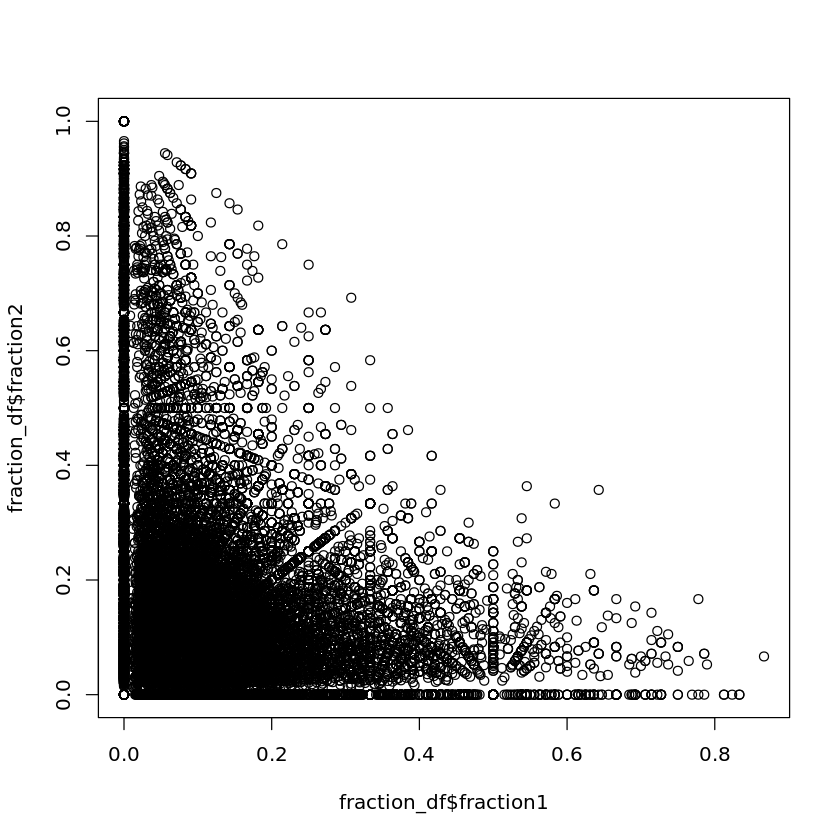

In [48]:
plot(fraction_df$fraction1, fraction_df$fraction2)

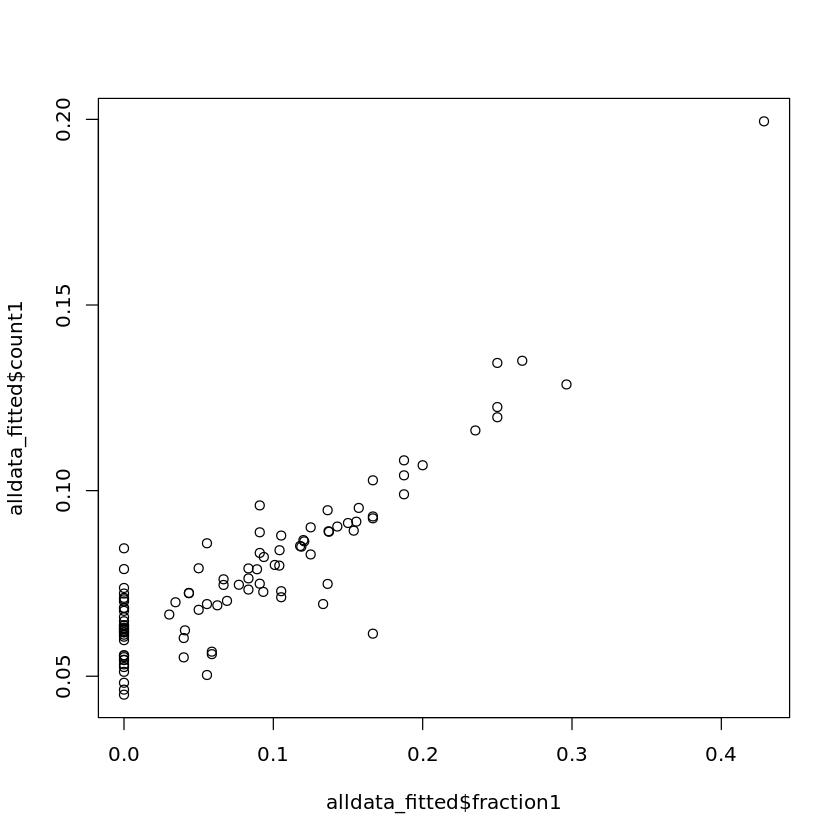

In [51]:
alldata_fitted = cbind(fitted(fit.sub), head(fraction_df,100))
plot(alldata_fitted$fraction1, alldata_fitted$count1)

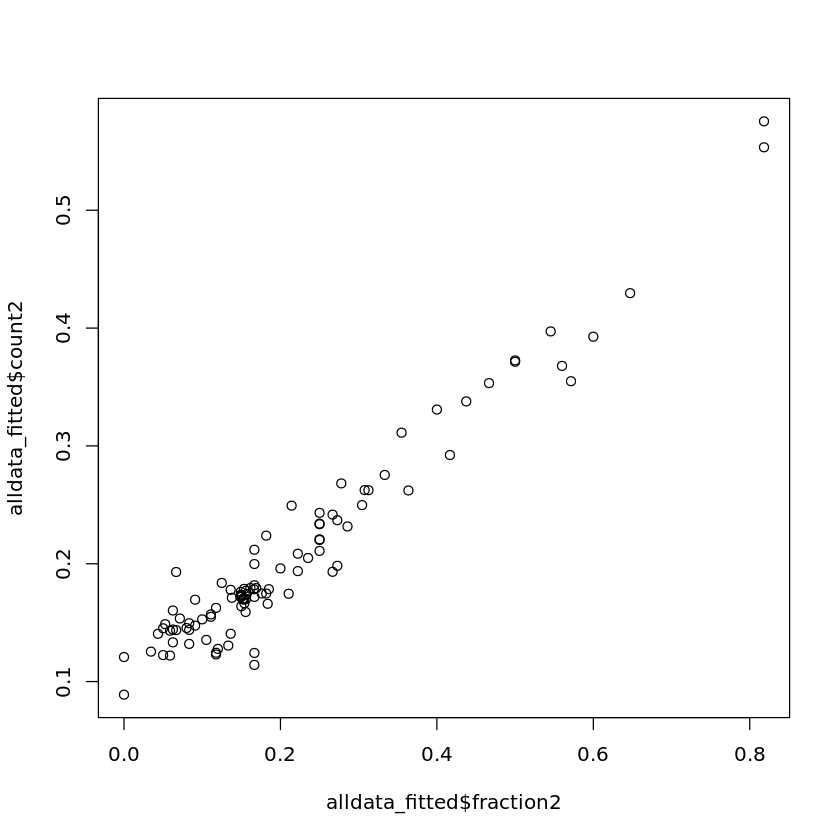

In [52]:
alldata_fitted = cbind(fitted(fit.sub), head(fraction_df,100))
plot(alldata_fitted$fraction2, alldata_fitted$count2)

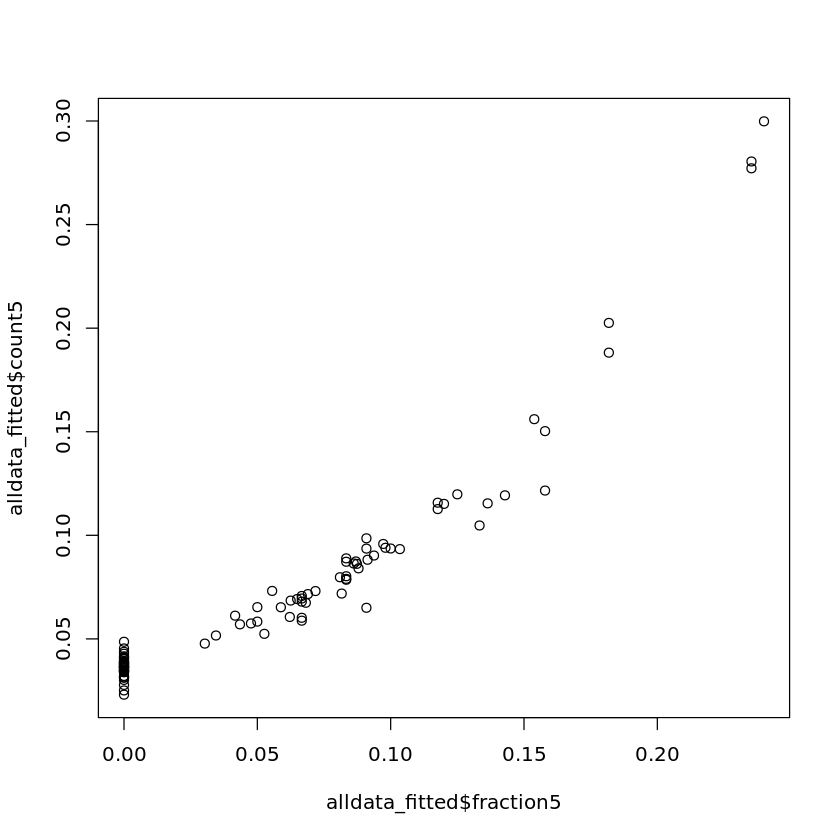

In [53]:
alldata_fitted = cbind(fitted(fit.sub), head(fraction_df,100))
plot(alldata_fitted$fraction5, alldata_fitted$count5)

In [60]:
fit.sub %>% (VGAM::Coef) 

(Intercept):1  (Intercept):2  (Intercept):3  (Intercept):4  (Intercept):5 
   -0.76414880    -0.08435984    -2.04385504    -0.66980719    -1.31644479 
 (Intercept):6  (Intercept):7  (Intercept):8  (Intercept):9 (Intercept):10 
   -1.28605347    -1.69209510    -0.22943699    -1.28548408    -4.17555404 
     fraction1      fraction2      fraction3      fraction4      fraction5 
    2.56339369     2.19890080     2.88691654     5.00788296     9.78809791 
     fraction6      fraction7      fraction8      fraction9 
    8.66983276     8.73750369     2.36907878     5.35811716

In [64]:
nn <- 5; M <- 4; set.seed(1)
ydata <- data.frame(round(matrix(runif(nn * M, max = 100), nn, M)))
colnames(ydata) <- paste("y", 1:M, sep = "")  # Integer counts

fit <- vglm(cbind(y1, y2, y3, y4) ~ 1, dirmultinomial,
            data = ydata, trace = TRUE)
# head(fitted(fit))
# depvar(fit)  # Sample proportions
# weights(fit, type = "prior", matrix = FALSE)  # Total counts per row
Coef(fit)

VGLM    linear loop  1 :  loglikelihood = -1428.784
VGLM    linear loop  2 :  loglikelihood = -1428.75
VGLM    linear loop  3 :  loglikelihood = -1428.744
VGLM    linear loop  4 :  loglikelihood = -1428.743
VGLM    linear loop  5 :  loglikelihood = -1428.742
VGLM    linear loop  6 :  loglikelihood = -1428.742
VGLM    linear loop  7 :  loglikelihood = -1428.742


prob[,1]/prob[,4]) prob[,2]/prob[,4]) prob[,3]/prob[,4])                phi 
        0.67891781         0.78776655         0.64695786         0.07985509

prob[,1]/prob[,4]) prob[,2]/prob[,4]) prob[,3]/prob[,4])                phi 
        0.67891781         0.78776655         0.64695786         0.07985509

In [ ]:
fit. = VGAM::vglm(head(as.matrix(count_df2),100) ~ head(as.matrix(fraction_df),100)[,1:ncol(fraction_df)-1], 
                 VGAM:: dirmultinomial(), trace = TRUE
                )


In [ ]:
fit

In [ ]:
nn <- 5; M <- 4; set.seed(1)
ydata <- data.frame(round(matrix(runif(nn * M, max = 100), nn, M)))
colnames(ydata) <- paste("y", 1:M, sep = "")  # Integer counts

fit <- vglm(cbind(y1, y2, y3, y4) ~ 1, dirmultinomial,
            data = ydata, trace = TRUE)
head(fitted(fit))
depvar(fit)  # Sample proportions
weights(fit, type = "prior", matrix = FALSE)  # Total counts per row

In [ ]:
ydata

In [ ]:
fit

In [ ]:
library(VGAM)
set.seed(123)
K <- 3 # number of categories
alpha_true <- rep(0.5, K) # true concentration parameter
x <- rdirichlet(100, alpha_true) # generate data

# Fit the model
fit <- vglm(x ~ 1, dirichlet(), scale.only = TRUE)

# Extract the estimated scale parameter
scale_est <- coef(fit)


In [ ]:
x~1

In [ ]:
# Example 2. Multinomial logit model
pneumo <- transform(pneumo, let = log(exposure.time))
vglm(cbind(normal, mild, severe) ~ let, multinomial, pneumo)

In [ ]:
# Example 1. See help(glm)
(d.AD <- data.frame(treatment = gl(3, 3),
                    outcome = gl(3, 1, 9),
                    counts = c(18,17,15,20,10,20,25,13,12)))
vglm.D93 <- vglm(counts ~ outcome + treatment, poissonff,
                 data = d.AD, trace = TRUE)
summary(vglm.D93)


# Example 2. Multinomial logit model
pneumo <- transform(pneumo, let = log(exposure.time))
vglm(cbind(normal, mild, severe) ~ let, multinomial, pneumo)


# Example 3. Proportional odds model
fit3 <- vglm(cbind(normal, mild, severe) ~ let, propodds, pneumo)
coef(fit3, matrix = TRUE)
constraints(fit3)
model.matrix(fit3, type = "lm")  # LM model matrix
model.matrix(fit3)               # Larger VGLM (or VLM) matrix


# Example 4. Bivariate logistic model
fit4 <- vglm(cbind(nBnW, nBW, BnW, BW) ~ age, binom2.or, coalminers)
coef(fit4, matrix = TRUE)
depvar(fit4)  # Response are proportions
weights(fit4, type = "prior")


# Example 5. The use of the xij argument (simple case).
# The constraint matrix for 'op' has one column.
nn <- 1000
eyesdat <- round(data.frame(lop = runif(nn),
                            rop = runif(nn),
                             op = runif(nn)), digits = 2)
eyesdat <- transform(eyesdat, eta1 = -1 + 2 * lop,
                              eta2 = -1 + 2 * lop)
eyesdat <- transform(eyesdat,
           leye = rbinom(nn, 1, prob = logitlink(eta1, inv = TRUE)),
           reye = rbinom(nn, 1, prob = logitlink(eta2, inv = TRUE)))
head(eyesdat)
fit5 <- vglm(cbind(leye, reye) ~ op,
             binom2.or(exchangeable = TRUE, zero = 3),
             data = eyesdat, trace = TRUE,
             xij = list(op ~ lop + rop + fill1(lop)),
             form2 = ~  op + lop + rop + fill1(lop))
coef(fit5)
coef(fit5, matrix = TRUE)
constraints(fit5)
fit5@control$xij
head(model.matrix(fit5))


# Example 6. The use of the 'constraints' argument.
as.character(~ bs(year,df=3))  # Get the white spaces right
clist <- list("(Intercept)"      = diag(3),
              "bs(year, df = 3)" = rbind(1, 0, 0))
fit1 <- VGAM::vglm(r1 ~ bs(year,df=3), gev(zero = NULL),
             data = venice, constraints = clist, trace = TRUE)
coef(fit1, matrix = TRUE)  # Check

In [ ]:
library(VGAM)
data(venice)
as.character(~ bs(year,df=3))  # Get the white spaces right
clist <- list("(Intercept)"      = diag(3),
              "bs(year, df = 3)" = rbind(1, 0, 0))
fit1 <- VGAM::vglm(r1 ~ bs(year,df=3), gev(zero = NULL),
             data = venice, constraints = clist, trace = TRUE)
coef(fit1, matrix = TRUE)  # Check

In [ ]:
fit1

In [ ]:
bs(venice$year,df=3)

In [ ]:
venice

In [ ]:
rbind(1, 0, 0)

In [ ]:
diag(10)

In [ ]:
library(VGAM)

In [ ]:
data(marital.nz)

In [ ]:
head(marital.nz, 4)

In [ ]:
summary(marital.nz)

In [ ]:
fit.ms <- vgam(mstatus ~ s(age, df = 3), multinomial(refLevel=2), data = marital.nz)

In [ ]:
head(depvar(fit.ms),4)

In [ ]:
mycol <- c("pink", "blue", "green")
par(mfrow=c(2,2))
plot(fit.ms, se = TRUE, scale = 12, lcol=mycol, scol=mycol) # the curves
plot(fit.ms, se = TRUE, scale = 12, lcol=mycol, scol=mycol, overlap = TRUE, llwd = 2)